In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We developed a variety of methods to trace field lines.  Several of these methods should be equivalent, and we demonstrate that they are in this workbook.

We implemented the following methods:

- BATSRUS SCIPY - Reads a BATSRUS file and determines field lines using SCIPY interpolator and solve_ivp
- BATSRUS SWMFIO - Same as BATSRUS SCIPY except it uses the SWMFIO interpolator
- VTK SCIPY - Same as BATSRUS SCIPY except it reads a VTK file and uses a VTK routine to determine cell centers (Note 1).
- VTK SCIPY (CC) - Same as VTK SCIPY except the cell centers are read from the VTK file (Note 1).
- VTK PARA - Uses VTK file and determines field lines with paraview.simple StreamTracer.

We expect that BATSRUS SCIPY, VTK SCIPY, and VTK SCIPY (CC), all of which use SCIPY interpolator and solve_ivp, will trace identical field lines when supplied with the same imput data.  To ensure equivalent input data is used, the BATSRUS file used with BATRSUS SCIPY is converted to VTK format via SWMFIO, so the input data for the VTK SCIPY methods is equivalent.

Note 1.  In a BATSRUS file, a grid is defined and the field is given at each grid point.  In a VTK file, the grid specifies the corners of the cells, and the field is given at each cell center.  The SWMFIO conversion from BATSRUS to VTK takes this into account, and will record the original BATSRUS grid, which corresponds to the cell centers in the VTK file.  Thus the VTK methods can calculate the cell centers from the VTK grid or can use the cell centers stored in the VTK file, leading to the two methods VTK SCIPY and VTK SCIPY (CC).

In [2]:
# Read results from magfli using the various methods outlined above
results = pd.read_pickle("compare_methods.pkl")

The file that we read via the above python code contains the results from compare_methods.py.  That python script ran the same data through the methods described above.  In this analysis, we will focus on the three that should provide identical results - BATSRUS SCIPY, VTK SCIPY, and VTK SCIPY (CC).

Below we list the column headings in the pickle dataframe, which we named results.  The headings start with words like BATSRUS SCIPY, VTK SCIPY, ... to indicate which method was used to determine the field lines.  

Four field lines are calculated - both directions from the point (-3,0,0) and both directions from point (-10,0,0).  The (x,y,z) points for the first field line are in ...Line_0_x, ...Line_0_y, ...Line_0_z, the second in ...Line_1_x, ...Line_1_y, ...Line_1_z, etc.  So column BATSRUS SCIPY Field Line_1_y contains the y-coordinate for the second field line calculated with the BATSRUS SCIPY method.

The python script calculates the arc length of each field line.  The arc length at the first point in the field line is 0, the arc length at the second point is 0 plus the distance between the 1st and 2nd points, ..., the arc length at point n+1 is the total arc length to point n plus the distance between points n and n+1.  The columns containing the arc lengths end in ...Arc Length_0, Arc Length_1, etc., corresponding to the four field lines.

Also stored in the dataframe are the differences between the fieldlines generated by the various methods.  The python script is given a two field lines calculated with two different methods, along with the arc lengths for both field lines.  The python script marches down each field line.  At the first point on both field lines the scalar distance between them is always zero because both field lines start at the same point.  The python script marches a short distance down both field lines, $\delta$.  At this second point, the scalar distance between the two field lines is determined.  Repeat until the end of the field lines is reached. If the two methods that generated the fieldlines are identical, the scalar distances are always zero.  These results are recorded in columns with headings like BATSRUS SCIPY VTK SCIPY Delta_0, which contains the scalar distances between the first field lines from the BATSRUS SCIPY and the VTK SCIPY methods.  Similarly, BATSRUS SCIPY VTK SCIPY (CC) Delta_1 contains the scalar distances between the second field line from BATSRUS SCIPY and the VTK SCIPY (CC) methods. 

Other columns are included in the dataframe, but are ignored in this analysis.

In [3]:
# To see all columns in the compare_methods.pkl dataframe, uncomment the lines below

#for i in results.columns:
#    print(i)

To familiarize ourselves with the field lines being examined, we plot the results from the BATSRUS SCIPY calculation.  The blue and orange field lines start at (-3,0,0) and the red and green lines start at (-10,0,0).  Both the forward and backwards integrations are shown.

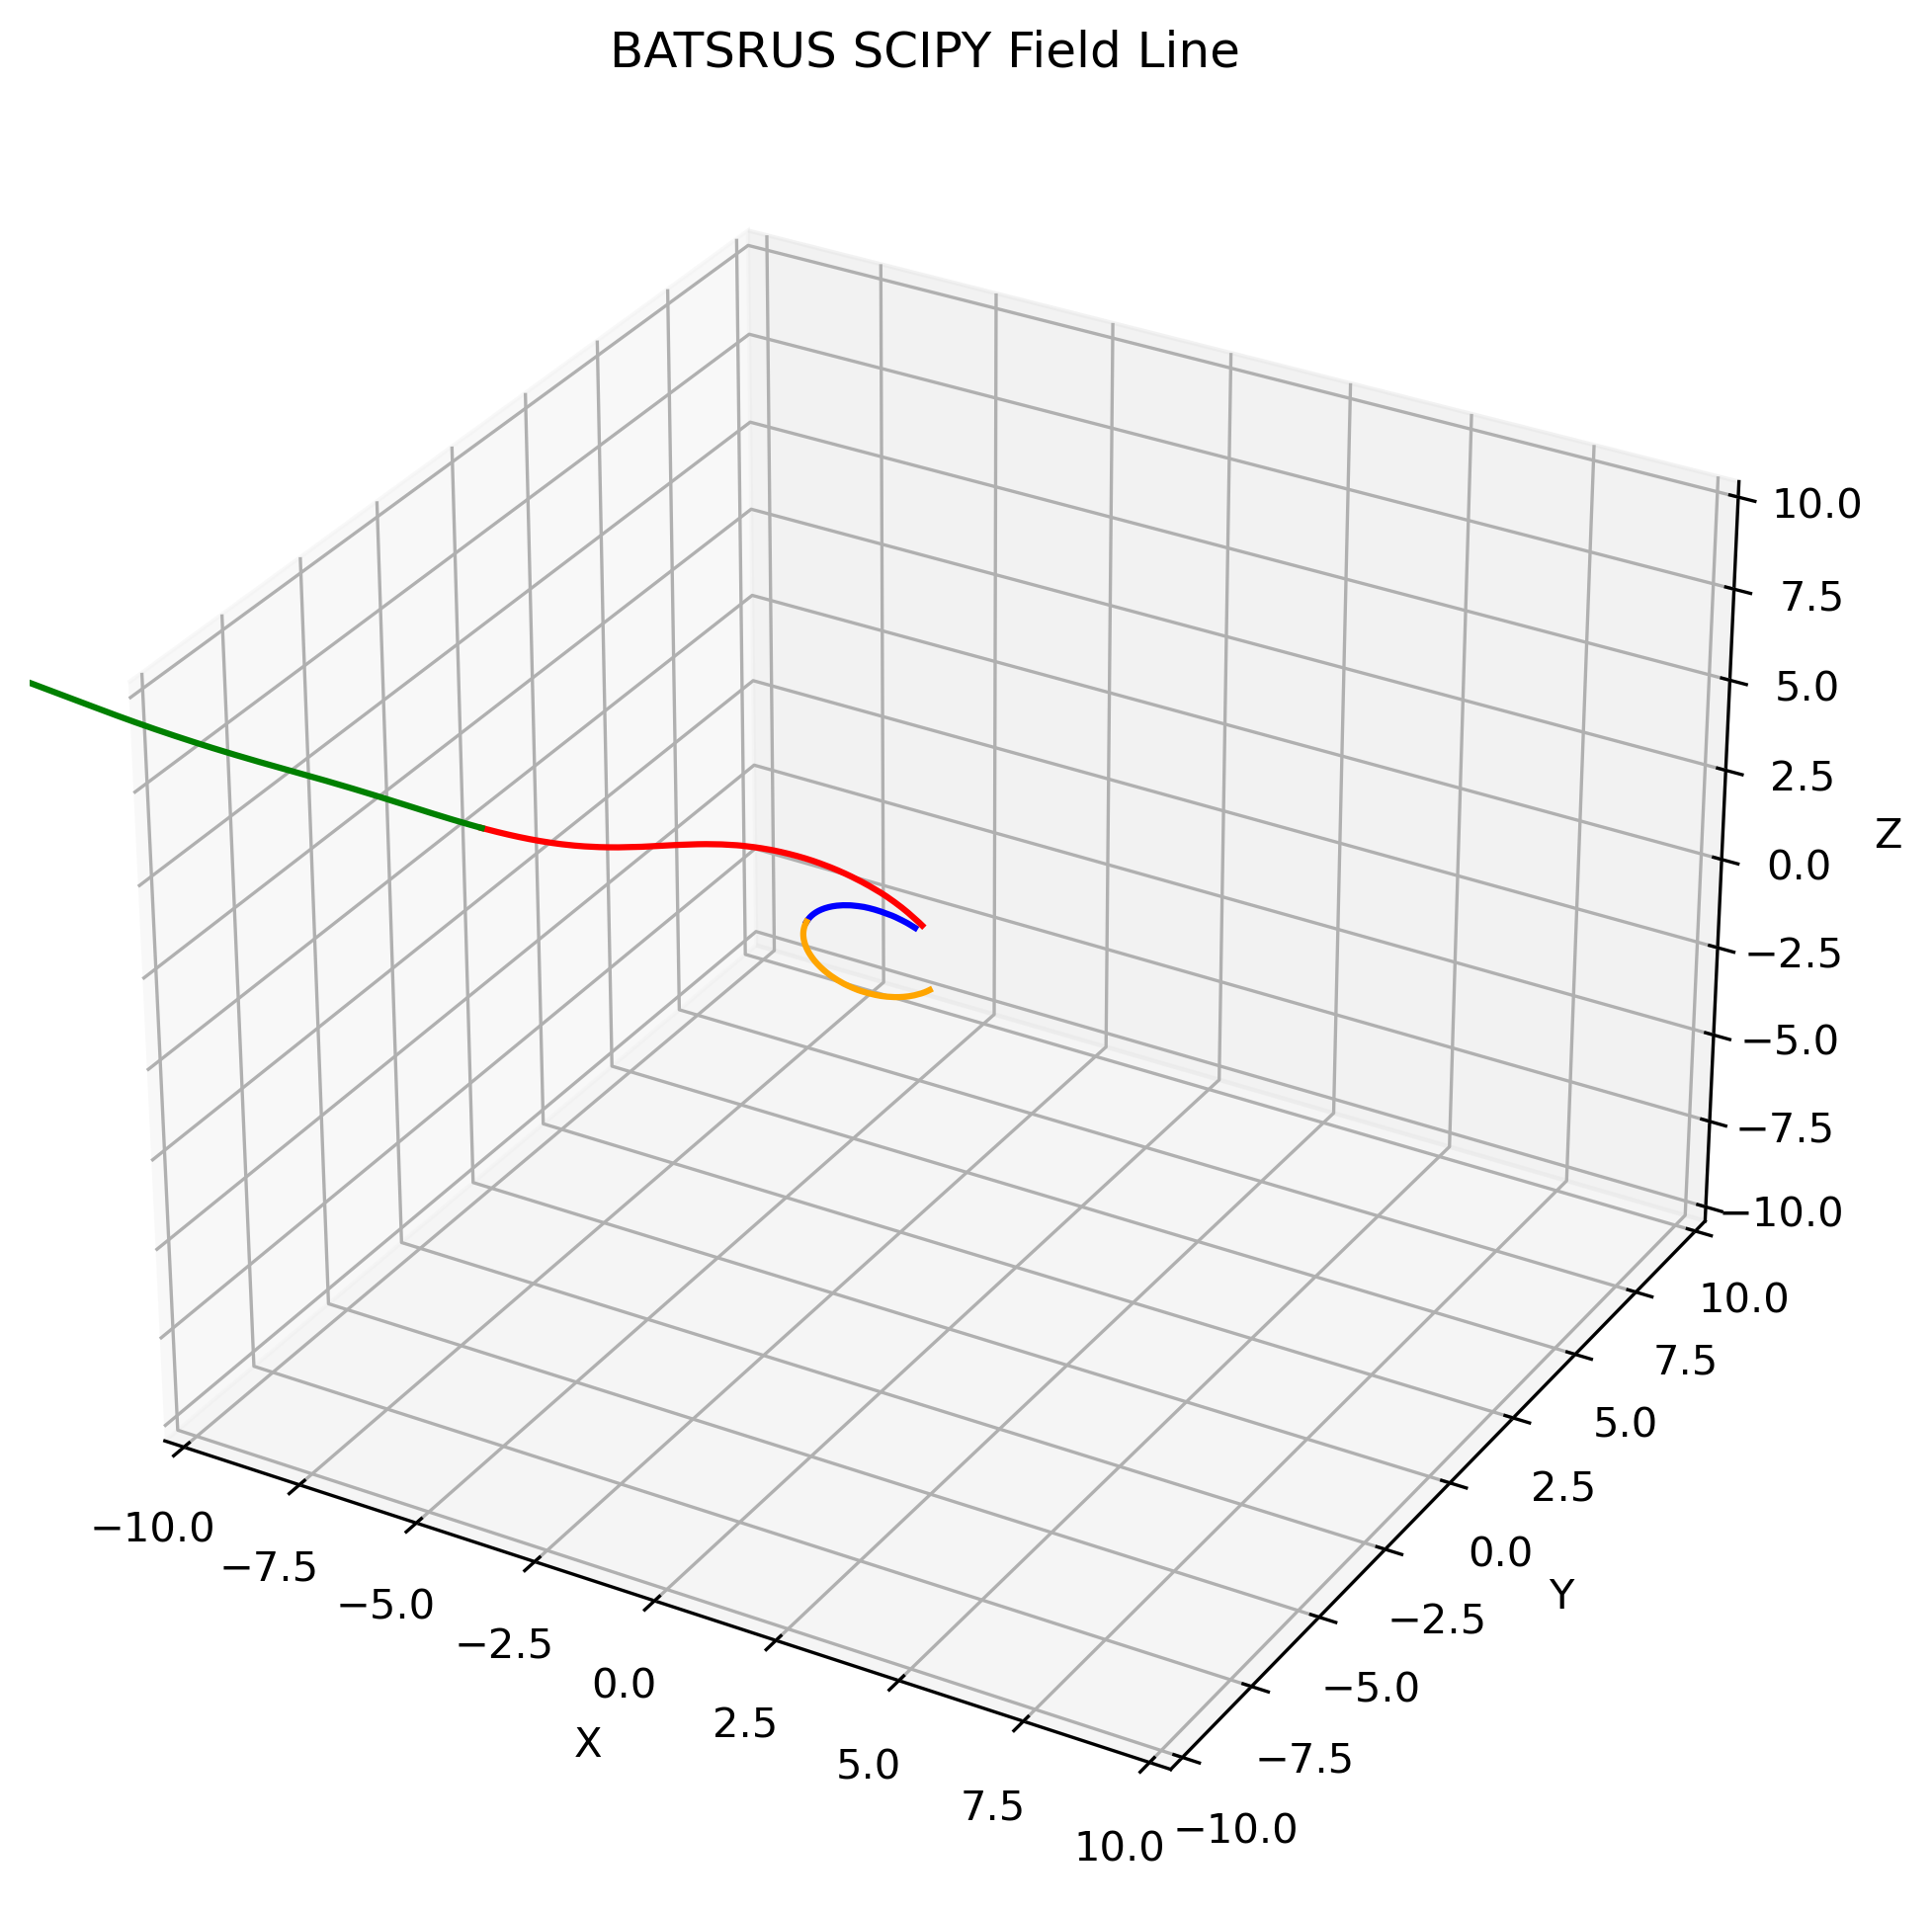

In [4]:
fig = plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection='3d')
ax.set_title('BATSRUS SCIPY Field Line')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
 
ax.plot( results['BATSRUS SCIPY Field Line_0_x'], results['BATSRUS SCIPY Field Line_0_y'], 
        results['BATSRUS SCIPY Field Line_0_z'], color='blue' )

ax.plot( results['BATSRUS SCIPY Field Line_1_x'], results['BATSRUS SCIPY Field Line_1_y'], 
        results['BATSRUS SCIPY Field Line_1_z'], color='red' )

ax.plot( results['BATSRUS SCIPY Field Line_2_x'], results['BATSRUS SCIPY Field Line_2_y'], 
        results['BATSRUS SCIPY Field Line_2_z'], color='orange' )

ax.plot( results['BATSRUS SCIPY Field Line_3_x'], results['BATSRUS SCIPY Field Line_3_y'], 
        results['BATSRUS SCIPY Field Line_3_z'], color='green' )

We expect, given the same input data, that BATSRUS SCIPY and VTK SCIPY will generate the same field lines.  Both methods use the same SCIPY interpolator and solve_ivp to determine field lines.  SWMFIO was used to convert the BATSRUS input file to VTK format, so both should have the same input data.  Below we plot the difference between the BATSRUS SCIPY and VTK SCIPY field lines (e.g., BATSRUS SCIPY VTK SCIPY Delta_0 for the first field line) versus arc length down the field lines.  Note, the y-axes are multipled by $10^{-20}$ to $10^{-21}$, thus the differences are small for all four field lines.

<AxesSubplot:xlabel='BATSRUS SCIPY VTK SCIPY Delta Arc Lengths_3'>

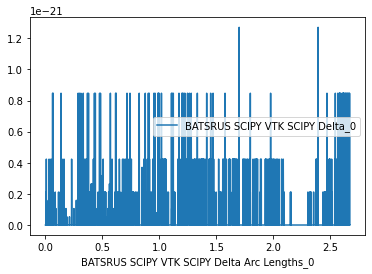

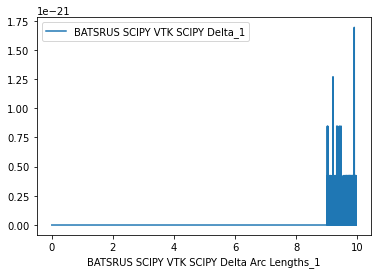

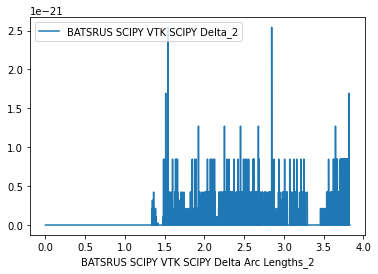

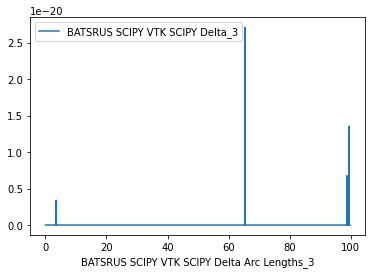

In [5]:
results.plot('BATSRUS SCIPY VTK SCIPY Delta Arc Lengths_0','BATSRUS SCIPY VTK SCIPY Delta_0')
results.plot('BATSRUS SCIPY VTK SCIPY Delta Arc Lengths_1','BATSRUS SCIPY VTK SCIPY Delta_1')
results.plot('BATSRUS SCIPY VTK SCIPY Delta Arc Lengths_2','BATSRUS SCIPY VTK SCIPY Delta_2')
results.plot('BATSRUS SCIPY VTK SCIPY Delta Arc Lengths_3','BATSRUS SCIPY VTK SCIPY Delta_3')

We see similar results when we compare the BATSRUS SCIPY and the VTK SCIPY (CC) methods.  The only difference is that VTK SCIPY (CC) uses the cell centers recorded in the VTK file during the conversion process versus VTK SCIPY that calculates the cell centers using a VTK routine.

<AxesSubplot:xlabel='BATSRUS SCIPY VTK SCIPY (CC) Delta Arc Lengths_3'>

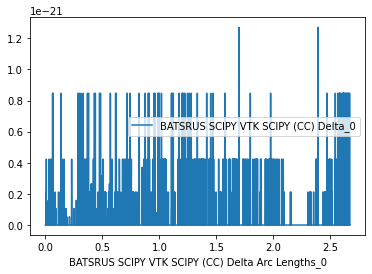

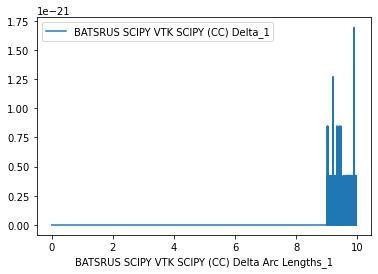

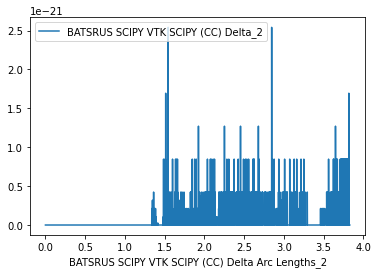

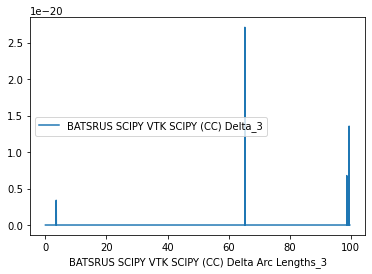

In [6]:
results.plot('BATSRUS SCIPY VTK SCIPY (CC) Delta Arc Lengths_0','BATSRUS SCIPY VTK SCIPY (CC) Delta_0')
results.plot('BATSRUS SCIPY VTK SCIPY (CC) Delta Arc Lengths_1','BATSRUS SCIPY VTK SCIPY (CC) Delta_1')
results.plot('BATSRUS SCIPY VTK SCIPY (CC) Delta Arc Lengths_2','BATSRUS SCIPY VTK SCIPY (CC) Delta_2')
results.plot('BATSRUS SCIPY VTK SCIPY (CC) Delta Arc Lengths_3','BATSRUS SCIPY VTK SCIPY (CC) Delta_3')

And when we compare the VTK SCIPY and the VTK SCIPY (CC) methods, the results are similar.

<AxesSubplot:xlabel='VTK SCIPY VTK SCIPY (CC) Delta Arc Lengths_3'>

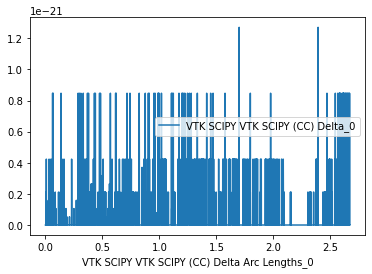

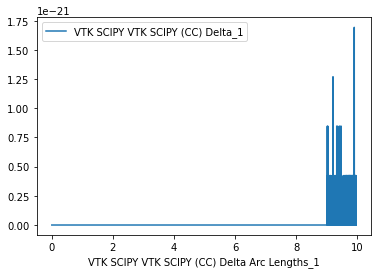

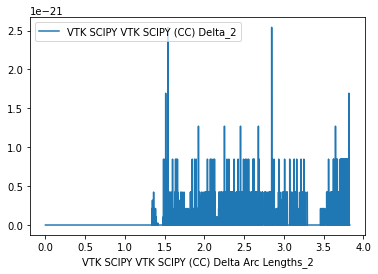

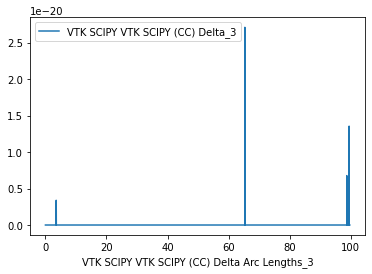

In [7]:
results.plot('VTK SCIPY VTK SCIPY (CC) Delta Arc Lengths_0','VTK SCIPY VTK SCIPY (CC) Delta_0')
results.plot('VTK SCIPY VTK SCIPY (CC) Delta Arc Lengths_1','VTK SCIPY VTK SCIPY (CC) Delta_1')
results.plot('VTK SCIPY VTK SCIPY (CC) Delta Arc Lengths_2','VTK SCIPY VTK SCIPY (CC) Delta_2')
results.plot('VTK SCIPY VTK SCIPY (CC) Delta Arc Lengths_3','VTK SCIPY VTK SCIPY (CC) Delta_3')

In conclusion, we consider the BATSRUS SCIPY, VTK SCIPY, and the VTK SCIPY (CC) methods to be identical.